In [13]:
#Import keras and cifar10 dataset
import keras
from keras.datasets import cifar10

In [14]:
#Load data 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

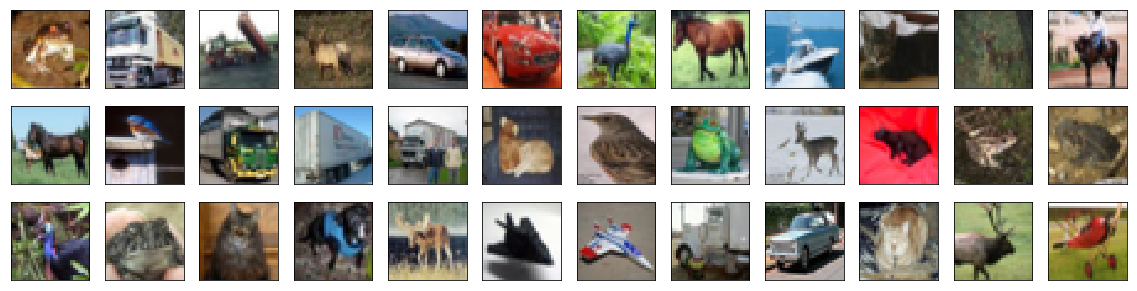

In [15]:
#Plot the images
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot (3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))


In [16]:
#Normalize your data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [17]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [18]:
#Simple Fully Connected Network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5010      
Total params: 3,578,510
Trainable params: 3,578,510
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5',verbose=1,save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 1.88060, saving model to MLP.weights.best.hdf5
 - 119s - loss: 2.2102 - acc: 0.2663 - val_loss: 1.8806 - val_acc: 0.2942
Epoch 2/20
Epoch 00002: val_loss improved from 1.88060 to 1.70131, saving model to MLP.weights.best.hdf5
 - 111s - loss: 1.8512 - acc: 0.3286 - val_loss: 1.7013 - val_acc: 0.3888
Epoch 3/20
Epoch 00003: val_loss did not improve
 - 114s - loss: 1.8080 - acc: 0.3488 - val_loss: 1.7351 - val_acc: 0.3818
Epoch 4/20
Epoch 00004: val_loss did not improve
 - 113s - loss: 1.7869 - acc: 0.3572 - val_loss: 1.7136 - val_acc: 0.3688
Epoch 5/20
Epoch 00005: val_loss did not improve
 - 114s - loss: 1.7746 - acc: 0.3676 - val_loss: 1.8108 - val_acc: 0.3412
Epoch 6/20
Epoch 00006: val_loss did not improve
 - 121s - loss: 1.7727 - acc: 0.3685 - val_loss: 1.8759 - val_acc: 0.3454
Epoch 7/20
Epoch 00007: val_loss did not improve
 - 139s - loss: 1.7697 - acc: 0.3713 - val_loss: 2.2172 

In [19]:
#CNN model
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
model = Sequential()
model.add(Conv2D(32,(2,2),padding='same',activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64,(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128,(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         32896     
__________

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [21]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='MLP.weights.best1.hdf5',verbose=1,save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
Epoch 00001: val_loss improved from inf to 1.40244, saving model to MLP.weights.best1.hdf5
 - 133s - loss: 1.6281 - acc: 0.4101 - val_loss: 1.4024 - val_acc: 0.5048
Epoch 2/20
Epoch 00002: val_loss improved from 1.40244 to 1.19902, saving model to MLP.weights.best1.hdf5
 - 126s - loss: 1.2507 - acc: 0.5555 - val_loss: 1.1990 - val_acc: 0.5712
Epoch 3/20
Epoch 00003: val_loss improved from 1.19902 to 1.01642, saving model to MLP.weights.best1.hdf5
 - 125s - loss: 1.1154 - acc: 0.6054 - val_loss: 1.0164 - val_acc: 0.6528
Epoch 4/20
Epoch 00004: val_loss improved from 1.01642 to 0.96740, saving model to MLP.weights.best1.hdf5
 - 125s - loss: 1.0414 - acc: 0.6336 - val_loss: 0.9674 - val_acc: 0.6788
Epoch 5/20
Epoch 00005: val_loss improved from 0.96740 to 0.93768, saving model to MLP.weights.best1.hdf5
 - 129s - loss: 1.0054 - acc: 0.6485 - val_loss: 0.9377 - val_acc: 0.6804
Epoch 6/20
Epoch 00006: val_loss improved from 0.93768 

In [23]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best1.hdf5')

In [24]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6928


In [25]:
#Predict
y_hat = model.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

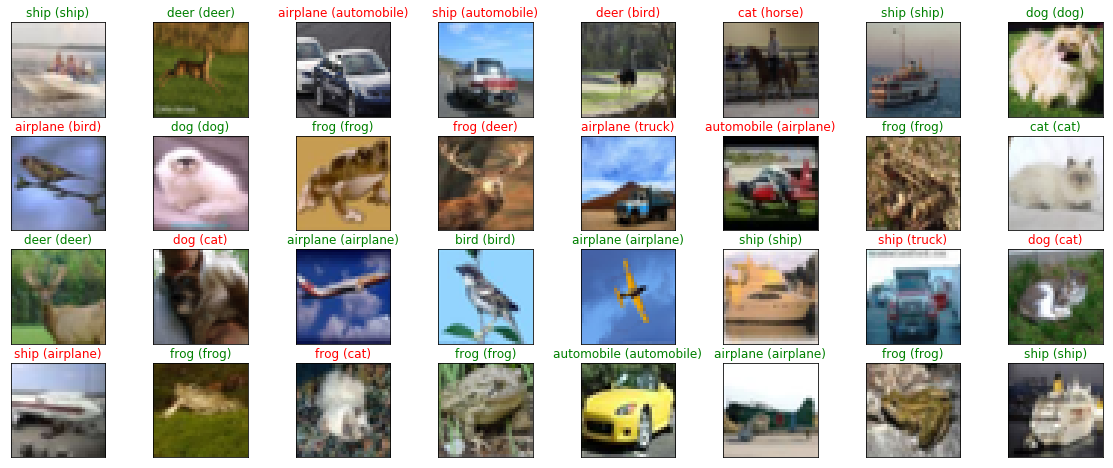

In [26]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))